In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2188 - loss: 1.6059
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2520 - loss: 1.5857 - val_accuracy: 0.2943 - val_loss: 1.5481
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2422 - loss: 1.5825
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2673 - loss: 1.5711 - val_accuracy: 0.3746 - val_loss: 1.5117
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2578 - loss: 1.5423
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3141 - loss: 1.5272 - val_accuracy: 0.3846 - val_loss: 1.4786
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3281 - loss: 1.4984
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3375 - loss: 1.4977 - val_accuracy: 0.3946 - val_loss: 1.4477
Epoch 5/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3516 - loss: 1.4941
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3821 - loss: 1.4543 - val_accuracy: 0.4013 - val_loss: 1.4172
Epoch 6/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4531 - loss: 1.4451
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4169 - loss: 1.4348 - val_accuracy: 0.3980 - val_loss: 1.3881
Epoch 7/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3906 - loss: 1.4001
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4207 - loss: 1.4053 - val_accuracy: 0.3980 - val_loss: 1.3625
Epoch 8/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3984 - loss: 1.3689
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3928 - loss: 1.3899 - val_accuracy: 0.3846 - val_loss: 1.3380
Epoch 9/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4453 - loss: 1.3580
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4019 - loss: 1.3639 - val_accuracy: 0.3813 - val_loss: 1.3145
Epoch 10/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3906 - loss: 1.3580
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4021 - loss: 1.3466 - val_accuracy: 0.4181 - val_loss: 1.2912
Epoch 11/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3594 - loss: 1.3919
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4024 - loss: 1.3549 - val_accuracy: 0.4783 - val_loss: 1.2682
Epoch 12/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4141 - loss: 1.3313
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4386 - loss: 1.3199 - val_accuracy: 0.5117 - val_loss: 1.2467
Epoch 13/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4688 - loss: 1.2559
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4505 - loss: 1.2868 - val_accuracy: 0.5084 - val_loss: 1.2254
Epoch 14/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4844 - loss: 1.2089
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4721 - loss: 1.2641 - val_accuracy: 0.4950 - val_loss: 1.2034
Epoch 15/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 1.2399
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4729 - loss: 1.2534 - val_accuracy: 0.4916 - val_loss: 1.1819
Epoch 16/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5156 - loss: 1.2354
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4933 - loss: 1.2287 - val_accuracy: 0.5251 - val_loss: 1.1600
Epoch 17/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4297 - loss: 1.2500
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4596 - loss: 1.2473 - val_accuracy: 0.5284 - val_loss: 1.1416
Epoch 18/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5078 - loss: 1.2038
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5043 - loss: 1.1960 - val_accuracy: 0.5284 - val_loss: 1.1246
Epoch 19/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5078 - loss: 1.2167
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4879 - loss: 1.2280 - val_accuracy: 0.5452 - val_loss: 1.1102
Epoch 20/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5078 - loss: 1.1781
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4969 - loss: 1.2045 - val_accuracy: 0.5719 - val_loss: 1.0970
Epoch 21/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4453 - loss: 1.2496
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4808 - loss: 1.2007 - val_accuracy: 0.5920 - val_loss: 1.0832
Epoch 22/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4922 - loss: 1.1716
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4858 - loss: 1.2027 - val_accuracy: 0.6054 - val_loss: 1.0710
Epoch 23/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5234 - loss: 1.1383
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5053 - loss: 1.1657 - val_accuracy: 0.6120 - val_loss: 1.0603
Epoch 24/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5234 - loss: 1.1600
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5112 - loss: 1.1831 - val_accuracy: 0.6087 - val_loss: 1.0515
Epoch 25/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4766 - loss: 1.2397
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4890 - loss: 1.1951 - val_accuracy: 0.6187 - val_loss: 1.0420
Epoch 26/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5312 - loss: 1.1044
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5143 - loss: 1.1489 - val_accuracy: 0.6221 - val_loss: 1.0313
Epoch 27/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5625 - loss: 1.0635
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5148 - loss: 1.1355 - val_accuracy: 0.6355 - val_loss: 1.0234
Epoch 28/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4844 - loss: 1.1326
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5023 - loss: 1.1285 - val_accuracy: 0.6355 - val_loss: 1.0165
Epoch 29/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5234 - loss: 1.1218
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5479 - loss: 1.1204 - val_accuracy: 0.6421 - val_loss: 1.0067
Epoch 30/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5312 - loss: 1.1074
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5155 - loss: 1.1334 - val_accuracy: 0.6522 - val_loss: 0.9960
Epoch 31/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 1.0766
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5377 - loss: 1.1237 - val_accuracy: 0.6589 - val_loss: 0.9849
Epoch 32/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4531 - loss: 1.2443
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5033 - loss: 1.1635 - val_accuracy: 0.6656 - val_loss: 0.9757
Epoch 33/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 1.0275
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5620 - loss: 1.0614 - val_accuracy: 0.6789 - val_loss: 0.9663
Epoch 34/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5469 - loss: 1.1963
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5423 - loss: 1.1425 - val_accuracy: 0.6756 - val_loss: 0.9573
Epoch 35/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 1.0243
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5596 - loss: 1.0768 - val_accuracy: 0.6856 - val_loss: 0.9464
Epoch 36/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5391 - loss: 1.0435
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5467 - loss: 1.0741 - val_accuracy: 0.6823 - val_loss: 0.9351
Epoch 37/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5391 - loss: 1.1143
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5649 - loss: 1.0777 - val_accuracy: 0.6856 - val_loss: 0.9233
Epoch 38/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5312 - loss: 1.0669
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5405 - loss: 1.0795 - val_accuracy: 0.6957 - val_loss: 0.9144
Epoch 39/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 1.0666
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5776 - loss: 1.0505 - val_accuracy: 0.6923 - val_loss: 0.9027
Epoch 40/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 1.0160
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5928 - loss: 1.0415 - val_accuracy: 0.6957 - val_loss: 0.8931
Epoch 41/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 1.0471
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5836 - loss: 1.0342 - val_accuracy: 0.6990 - val_loss: 0.8861
Epoch 42/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5391 - loss: 1.0582
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5638 - loss: 1.0602 - val_accuracy: 0.6957 - val_loss: 0.8775
Epoch 43/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5703 - loss: 1.0415
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5745 - loss: 1.0314 - val_accuracy: 0.7023 - val_loss: 0.8663
Epoch 44/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 0.9693
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5951 - loss: 0.9957 - val_accuracy: 0.7124 - val_loss: 0.8557
Epoch 45/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 1.1279
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5797 - loss: 1.0643 - val_accuracy: 0.7324 - val_loss: 0.8447
Epoch 46/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5234 - loss: 1.1509
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5604 - loss: 1.0909 - val_accuracy: 0.7458 - val_loss: 0.8346
Epoch 47/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 1.0050
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6000 - loss: 1.0144 - val_accuracy: 0.7425 - val_loss: 0.8230
Epoch 48/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.9646
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6026 - loss: 0.9965 - val_accuracy: 0.7258 - val_loss: 0.8134
Epoch 49/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5703 - loss: 0.9990
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5725 - loss: 1.0074 - val_accuracy: 0.7291 - val_loss: 0.8050
Epoch 50/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 1.0655
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5816 - loss: 1.0153 - val_accuracy: 0.7324 - val_loss: 0.8015
Epoch 51/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 1.0959
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5855 - loss: 1.0383 - val_accuracy: 0.7525 - val_loss: 0.7954
Epoch 52/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 1.0364
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5909 - loss: 0.9970 - val_accuracy: 0.7659 - val_loss: 0.7875
Epoch 53/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5859 - loss: 1.0810
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5829 - loss: 1.0150 - val_accuracy: 0.7726 - val_loss: 0.7815
Epoch 54/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.9586
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6082 - loss: 0.9838 - val_accuracy: 0.7659 - val_loss: 0.7753
Epoch 55/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7031 - loss: 0.8539
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6253 - loss: 0.9411 - val_accuracy: 0.7793 - val_loss: 0.7676
Epoch 56/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5703 - loss: 1.0666
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5906 - loss: 0.9986 - val_accuracy: 0.7793 - val_loss: 0.7602
Epoch 57/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.9188
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5976 - loss: 0.9915 - val_accuracy: 0.7926 - val_loss: 0.7547
Epoch 58/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.9574
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6327 - loss: 0.9485 - val_accuracy: 0.7960 - val_loss: 0.7479
Epoch 59/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5312 - loss: 1.0143
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6016 - loss: 0.9652 - val_accuracy: 0.7926 - val_loss: 0.7401
Epoch 60/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5156 - loss: 1.0235
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5845 - loss: 0.9773 - val_accuracy: 0.7926 - val_loss: 0.7336
Epoch 61/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.8748
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6440 - loss: 0.9200 - val_accuracy: 0.7993 - val_loss: 0.7256
Epoch 62/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5312 - loss: 1.0383
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5812 - loss: 0.9996 - val_accuracy: 0.7960 - val_loss: 0.7163
Epoch 63/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9934
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6217 - loss: 0.9470 - val_accuracy: 0.7993 - val_loss: 0.7092
Epoch 64/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.9445
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6034 - loss: 0.9797 - val_accuracy: 0.7993 - val_loss: 0.7059
Epoch 65/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.8707
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6396 - loss: 0.9170 - val_accuracy: 0.8094 - val_loss: 0.7022
Epoch 66/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.9682
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6262 - loss: 0.9276 - val_accuracy: 0.8060 - val_loss: 0.6961
Epoch 67/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.9131
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6145 - loss: 0.9334 - val_accuracy: 0.8161 - val_loss: 0.6877
Epoch 68/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5234 - loss: 1.1020
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6131 - loss: 0.9584 - val_accuracy: 0.8227 - val_loss: 0.6812
Epoch 69/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.9319
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6206 - loss: 0.9319 - val_accuracy: 0.8194 - val_loss: 0.6773
Epoch 70/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9853
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6093 - loss: 0.9342 - val_accuracy: 0.8194 - val_loss: 0.6746
Epoch 71/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6328 - loss: 0.9288
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6183 - loss: 0.9340 - val_accuracy: 0.8127 - val_loss: 0.6693
Epoch 72/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.8378
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6357 - loss: 0.8761 - val_accuracy: 0.8127 - val_loss: 0.6616
Epoch 73/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.8982
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6497 - loss: 0.8901 - val_accuracy: 0.8161 - val_loss: 0.6507
Epoch 74/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 0.9661
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6076 - loss: 0.9214 - val_accuracy: 0.8328 - val_loss: 0.6427
Epoch 75/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6094 - loss: 0.9641
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6328 - loss: 0.9131 - val_accuracy: 0.8294 - val_loss: 0.6405
Epoch 76/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.9012
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6708 - loss: 0.8829 - val_accuracy: 0.8428 - val_loss: 0.6365
Epoch 77/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 0.9708
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6181 - loss: 0.9030 - val_accuracy: 0.8395 - val_loss: 0.6318
Epoch 78/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.9346
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6465 - loss: 0.8995 - val_accuracy: 0.8428 - val_loss: 0.6268
Epoch 79/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.8741
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6350 - loss: 0.9013 - val_accuracy: 0.8328 - val_loss: 0.6204
Epoch 80/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.8391
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6351 - loss: 0.8825 - val_accuracy: 0.8328 - val_loss: 0.6178
Epoch 81/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6406 - loss: 0.8881
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6414 - loss: 0.8714 - val_accuracy: 0.8361 - val_loss: 0.6118
Epoch 82/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9351
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6152 - loss: 0.8883 - val_accuracy: 0.8328 - val_loss: 0.6056
Epoch 83/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 0.8869
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6168 - loss: 0.8942 - val_accuracy: 0.8528 - val_loss: 0.6001
Epoch 84/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.8199
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6523 - loss: 0.8824 - val_accuracy: 0.8528 - val_loss: 0.5975
Epoch 85/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 0.9590
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6599 - loss: 0.8629 - val_accuracy: 0.8629 - val_loss: 0.5926
Epoch 86/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.8465
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6535 - loss: 0.8607 - val_accuracy: 0.8595 - val_loss: 0.5888
Epoch 87/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6484 - loss: 0.9797
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6574 - loss: 0.8883 - val_accuracy: 0.8595 - val_loss: 0.5857
Epoch 88/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.8298
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6299 - loss: 0.8788 - val_accuracy: 0.8462 - val_loss: 0.5817
Epoch 89/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.8803
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6799 - loss: 0.8523 - val_accuracy: 0.8462 - val_loss: 0.5788
Epoch 90/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6172 - loss: 0.9080
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6419 - loss: 0.8725 - val_accuracy: 0.8562 - val_loss: 0.5759
Epoch 91/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.8380
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6602 - loss: 0.8466 - val_accuracy: 0.8595 - val_loss: 0.5762
Epoch 92/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.9152
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6691 - loss: 0.8391 - val_accuracy: 0.8528 - val_loss: 0.5770
Epoch 93/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6719 - loss: 0.8661
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6573 - loss: 0.8398 - val_accuracy: 0.8495 - val_loss: 0.5731
Epoch 94/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7620
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6971 - loss: 0.7864 - val_accuracy: 0.8395 - val_loss: 0.5672
Epoch 95/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 0.8450
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6485 - loss: 0.8743 - val_accuracy: 0.8462 - val_loss: 0.5619
Epoch 96/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.8228
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6928 - loss: 0.7999 - val_accuracy: 0.8629 - val_loss: 0.5539
Epoch 97/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7402
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6683 - loss: 0.8093 - val_accuracy: 0.8696 - val_loss: 0.5503
Epoch 98/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7344 - loss: 0.7187
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6878 - loss: 0.8023 - val_accuracy: 0.8629 - val_loss: 0.5496
Epoch 99/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6250 - loss: 0.8414
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6556 - loss: 0.8169 - val_accuracy: 0.8562 - val_loss: 0.5471
Epoch 100/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.9014
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6908 - loss: 0.8393 - val_accuracy: 0.8528 - val_loss: 0.5398
Epoch 101/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6016 - loss: 0.8680
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6387 - loss: 0.8366 - val_accuracy: 0.8629 - val_loss: 0.5340
Epoch 102/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.8077
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6781 - loss: 0.8091 - val_accuracy: 0.8629 - val_loss: 0.5316
Epoch 103/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7134
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6872 - loss: 0.7578 - val_accuracy: 0.8629 - val_loss: 0.5261
Epoch 104/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.8758
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6755 - loss: 0.8210 - val_accuracy: 0.8662 - val_loss: 0.5244
Epoch 105/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7644
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6928 - loss: 0.8038 - val_accuracy: 0.8629 - val_loss: 0.5217
Epoch 106/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7242
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7042 - loss: 0.7616 - val_accuracy: 0.8696 - val_loss: 0.5177
Epoch 107/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.8880
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6591 - loss: 0.8501 - val_accuracy: 0.8696 - val_loss: 0.5161
Epoch 108/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.8235
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6731 - loss: 0.8207 - val_accuracy: 0.8729 - val_loss: 0.5143
Epoch 109/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.8144
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6679 - loss: 0.8183 - val_accuracy: 0.8696 - val_loss: 0.5111
Epoch 110/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7290
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6784 - loss: 0.7733 - val_accuracy: 0.8696 - val_loss: 0.5070
Epoch 111/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.8464
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6392 - loss: 0.8075 - val_accuracy: 0.8763 - val_loss: 0.5053
Epoch 112/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7519
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6762 - loss: 0.7797 - val_accuracy: 0.8829 - val_loss: 0.5021
Epoch 113/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5703 - loss: 0.9811
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6379 - loss: 0.8509 - val_accuracy: 0.8930 - val_loss: 0.5012
Epoch 114/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.7331
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7175 - loss: 0.7765 - val_accuracy: 0.8863 - val_loss: 0.4998
Epoch 115/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6797 - loss: 0.8606
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6628 - loss: 0.8348 - val_accuracy: 0.8896 - val_loss: 0.4970
Epoch 116/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.8484
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6787 - loss: 0.8150 - val_accuracy: 0.8963 - val_loss: 0.4961
Epoch 117/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.8036
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6840 - loss: 0.7998 - val_accuracy: 0.8963 - val_loss: 0.4901
Epoch 118/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6953 - loss: 0.8092
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7082 - loss: 0.8174 - val_accuracy: 0.8997 - val_loss: 0.4845
Epoch 119/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7461
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6807 - loss: 0.7708 - val_accuracy: 0.8997 - val_loss: 0.4807
Epoch 120/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7031 - loss: 0.7527
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6923 - loss: 0.7624 - val_accuracy: 0.8963 - val_loss: 0.4773
Epoch 121/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.6738
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6874 - loss: 0.7492 - val_accuracy: 0.9030 - val_loss: 0.4730
Epoch 122/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 0.7373
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7076 - loss: 0.7330 - val_accuracy: 0.9064 - val_loss: 0.4653
Epoch 123/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6808
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7214 - loss: 0.7585 - val_accuracy: 0.9064 - val_loss: 0.4579
Epoch 124/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.7649
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6718 - loss: 0.7890 - val_accuracy: 0.9030 - val_loss: 0.4537
Epoch 125/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6094 - loss: 0.9850
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6505 - loss: 0.8423 - val_accuracy: 0.9164 - val_loss: 0.4565
Epoch 126/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7342
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7052 - loss: 0.7559 - val_accuracy: 0.9130 - val_loss: 0.4587
Epoch 127/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.7308
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6757 - loss: 0.7492 - val_accuracy: 0.9064 - val_loss: 0.4598
Epoch 128/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7808
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6841 - loss: 0.7965 - val_accuracy: 0.9030 - val_loss: 0.4620
Epoch 129/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7172
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7007 - loss: 0.7309 - val_accuracy: 0.9030 - val_loss: 0.4591
Epoch 130/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6484 - loss: 0.8587
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6921 - loss: 0.7810 - val_accuracy: 0.9130 - val_loss: 0.4504
Epoch 131/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7521
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6834 - loss: 0.7608 - val_accuracy: 0.9164 - val_loss: 0.4422
Epoch 132/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6172 - loss: 0.8832
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6478 - loss: 0.8312 - val_accuracy: 0.9197 - val_loss: 0.4416
Epoch 133/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 0.7958
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6764 - loss: 0.7527 - val_accuracy: 0.9097 - val_loss: 0.4397
Epoch 134/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.7328
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7012 - loss: 0.7582 - val_accuracy: 0.9064 - val_loss: 0.4381
Epoch 135/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7565
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6924 - loss: 0.7763 - val_accuracy: 0.9064 - val_loss: 0.4414
Epoch 136/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7578 - loss: 0.6469
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7221 - loss: 0.7154 - val_accuracy: 0.9197 - val_loss: 0.4409
Epoch 137/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6953 - loss: 0.7583
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7128 - loss: 0.7239 - val_accuracy: 0.9164 - val_loss: 0.4383
Epoch 138/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7393
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7172 - loss: 0.7337 - val_accuracy: 0.9164 - val_loss: 0.4340
Epoch 139/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7325
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6975 - loss: 0.7296 - val_accuracy: 0.9097 - val_loss: 0.4291
Epoch 140/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.7981
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6850 - loss: 0.7675 - val_accuracy: 0.9097 - val_loss: 0.4276
Epoch 141/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7299
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6876 - loss: 0.7484 - val_accuracy: 0.9130 - val_loss: 0.4243
Epoch 142/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7024
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6939 - loss: 0.7355 - val_accuracy: 0.8997 - val_loss: 0.4233
Epoch 143/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6953 - loss: 0.7789
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7193 - loss: 0.7298 - val_accuracy: 0.9164 - val_loss: 0.4238
Epoch 144/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6449
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7085 - loss: 0.7306 - val_accuracy: 0.9197 - val_loss: 0.4216
Epoch 145/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6719 - loss: 0.8161
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6967 - loss: 0.7753 - val_accuracy: 0.9264 - val_loss: 0.4195
Epoch 146/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6797 - loss: 0.7869
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6955 - loss: 0.7540 - val_accuracy: 0.9331 - val_loss: 0.4169
Epoch 147/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.7782
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6947 - loss: 0.7357 - val_accuracy: 0.9331 - val_loss: 0.4123
Epoch 148/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.7130
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7313 - loss: 0.7102 - val_accuracy: 0.9231 - val_loss: 0.4087
Epoch 149/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6534
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7266 - loss: 0.7052 - val_accuracy: 0.9164 - val_loss: 0.4045
Epoch 150/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7645
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7063 - loss: 0.7737 - val_accuracy: 0.9231 - val_loss: 0.4036
Epoch 151/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7031 - loss: 0.8120
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6852 - loss: 0.7946 - val_accuracy: 0.9231 - val_loss: 0.4082
Epoch 152/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7344 - loss: 0.7061
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7162 - loss: 0.7230 - val_accuracy: 0.9231 - val_loss: 0.4093
Epoch 153/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6882
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7021 - loss: 0.7208 - val_accuracy: 0.9231 - val_loss: 0.4108
Epoch 154/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6867
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6935 - loss: 0.7395 - val_accuracy: 0.9231 - val_loss: 0.4122
Epoch 155/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7473
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7180 - loss: 0.7321 - val_accuracy: 0.9197 - val_loss: 0.4077
Epoch 156/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.7187
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7018 - loss: 0.7190 - val_accuracy: 0.9197 - val_loss: 0.4000
Epoch 157/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7409
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7058 - loss: 0.7201 - val_accuracy: 0.9197 - val_loss: 0.3944
Epoch 158/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.6031
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7246 - loss: 0.6879 - val_accuracy: 0.9231 - val_loss: 0.3925
Epoch 159/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7092
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7165 - loss: 0.7125 - val_accuracy: 0.9231 - val_loss: 0.3939
Epoch 160/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7106
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7020 - loss: 0.7193 - val_accuracy: 0.9197 - val_loss: 0.3949
Epoch 161/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7031 - loss: 0.6965
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7104 - loss: 0.6986 - val_accuracy: 0.9298 - val_loss: 0.3911
Epoch 162/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.7469
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6999 - loss: 0.7119 - val_accuracy: 0.9298 - val_loss: 0.3905
Epoch 163/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.8083
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6887 - loss: 0.7418 - val_accuracy: 0.9298 - val_loss: 0.3907
Epoch 164/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.7988
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7231 - loss: 0.7356 - val_accuracy: 0.9298 - val_loss: 0.3911
Epoch 165/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7635
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7235 - loss: 0.7139 - val_accuracy: 0.9298 - val_loss: 0.3882
Epoch 166/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7076
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7009 - loss: 0.7335 - val_accuracy: 0.9264 - val_loss: 0.3869
Epoch 167/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7109 - loss: 0.7212
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7094 - loss: 0.7327 - val_accuracy: 0.9264 - val_loss: 0.3890
Epoch 168/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7543
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7100 - loss: 0.7288 - val_accuracy: 0.9231 - val_loss: 0.3897
Epoch 169/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7210
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7166 - loss: 0.7371 - val_accuracy: 0.9231 - val_loss: 0.3896
Epoch 170/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6640
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7318 - loss: 0.7017 - val_accuracy: 0.9264 - val_loss: 0.3909
Epoch 171/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7464
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7194 - loss: 0.6889 - val_accuracy: 0.9197 - val_loss: 0.3921
Epoch 172/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6977
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7199 - loss: 0.7099 - val_accuracy: 0.9264 - val_loss: 0.3846
Epoch 173/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7482
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7198 - loss: 0.6885 - val_accuracy: 0.9264 - val_loss: 0.3801
Epoch 174/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.7261
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7305 - loss: 0.6805 - val_accuracy: 0.9264 - val_loss: 0.3744
Epoch 175/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7604
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7064 - loss: 0.7401 - val_accuracy: 0.9264 - val_loss: 0.3691
Epoch 176/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.7275
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7037 - loss: 0.7170 - val_accuracy: 0.9298 - val_loss: 0.3686
Epoch 177/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.6096
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7571 - loss: 0.6747 - val_accuracy: 0.9298 - val_loss: 0.3687
Epoch 178/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6017
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7405 - loss: 0.6574 - val_accuracy: 0.9298 - val_loss: 0.3708
Epoch 179/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7266 - loss: 0.6769
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7029 - loss: 0.7109 - val_accuracy: 0.9298 - val_loss: 0.3703
Epoch 180/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6516
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7364 - loss: 0.7084 - val_accuracy: 0.9231 - val_loss: 0.3708
Epoch 181/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7231
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7234 - loss: 0.7007 - val_accuracy: 0.9264 - val_loss: 0.3698
Epoch 182/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7586
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6981 - loss: 0.7372 - val_accuracy: 0.9298 - val_loss: 0.3659
Epoch 183/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7756
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6958 - loss: 0.7682 - val_accuracy: 0.9298 - val_loss: 0.3660
Epoch 184/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6310
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7416 - loss: 0.6589 - val_accuracy: 0.9298 - val_loss: 0.3634
Epoch 185/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7266 - loss: 0.5726
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7154 - loss: 0.6555 - val_accuracy: 0.9298 - val_loss: 0.3624
Epoch 186/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7104
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7204 - loss: 0.6872 - val_accuracy: 0.9331 - val_loss: 0.3605
Epoch 187/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7763
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7130 - loss: 0.7274 - val_accuracy: 0.9331 - val_loss: 0.3560
Epoch 188/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6875 - loss: 0.7240
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7069 - loss: 0.7203 - val_accuracy: 0.9331 - val_loss: 0.3537
Epoch 189/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6744
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7267 - loss: 0.6953 - val_accuracy: 0.9331 - val_loss: 0.3537
Epoch 190/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 0.6214
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7451 - loss: 0.6562 - val_accuracy: 0.9331 - val_loss: 0.3534
Epoch 191/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6735
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7152 - loss: 0.6898 - val_accuracy: 0.9298 - val_loss: 0.3564
Epoch 192/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.6759
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6941 - loss: 0.6943 - val_accuracy: 0.9298 - val_loss: 0.3591
Epoch 193/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.5897
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7267 - loss: 0.6422 - val_accuracy: 0.9264 - val_loss: 0.3550
Epoch 194/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.8115
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7175 - loss: 0.7411 - val_accuracy: 0.9264 - val_loss: 0.3561
Epoch 195/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.7399
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7346 - loss: 0.6991 - val_accuracy: 0.9298 - val_loss: 0.3546
Epoch 196/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.8732
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6875 - loss: 0.7474 - val_accuracy: 0.9298 - val_loss: 0.3526
Epoch 197/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.7325
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6892 - loss: 0.7085 - val_accuracy: 0.9331 - val_loss: 0.3495
Epoch 198/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6600
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7401 - loss: 0.6730 - val_accuracy: 0.9331 - val_loss: 0.3478
Epoch 199/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7266 - loss: 0.6293
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7432 - loss: 0.6395 - val_accuracy: 0.9331 - val_loss: 0.3470
Epoch 200/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6738
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7223 - loss: 0.6702 - val_accuracy: 0.9298 - val_loss: 0.3475
Epoch 201/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7235
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7256 - loss: 0.6845 - val_accuracy: 0.9298 - val_loss: 0.3481
Epoch 202/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7734 - loss: 0.6368
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7616 - loss: 0.6735 - val_accuracy: 0.9298 - val_loss: 0.3479
Epoch 203/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6291
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7309 - loss: 0.6467 - val_accuracy: 0.9298 - val_loss: 0.3473
Epoch 204/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7229
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7280 - loss: 0.6761 - val_accuracy: 0.9298 - val_loss: 0.3477
Epoch 205/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6456
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7378 - loss: 0.6706 - val_accuracy: 0.9264 - val_loss: 0.3460
Epoch 206/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7150
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7111 - loss: 0.7526 - val_accuracy: 0.9298 - val_loss: 0.3468
Epoch 207/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6359
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7463 - loss: 0.6576 - val_accuracy: 0.9331 - val_loss: 0.3475
Epoch 208/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7087
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7454 - loss: 0.6792 - val_accuracy: 0.9331 - val_loss: 0.3466
Epoch 209/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6301
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7346 - loss: 0.6699 - val_accuracy: 0.9331 - val_loss: 0.3448
Epoch 210/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7109 - loss: 0.6769
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7138 - loss: 0.6807 - val_accuracy: 0.9365 - val_loss: 0.3416
Epoch 211/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.7041
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7588 - loss: 0.6681 - val_accuracy: 0.9365 - val_loss: 0.3389
Epoch 212/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7011
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7159 - loss: 0.6735 - val_accuracy: 0.9331 - val_loss: 0.3342
Epoch 213/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 0.7197
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7215 - loss: 0.7041 - val_accuracy: 0.9331 - val_loss: 0.3319
Epoch 214/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6381
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7440 - loss: 0.6519 - val_accuracy: 0.9331 - val_loss: 0.3296
Epoch 215/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.7000
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7208 - loss: 0.6968 - val_accuracy: 0.9365 - val_loss: 0.3290
Epoch 216/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6719 - loss: 0.7410
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7048 - loss: 0.6931 - val_accuracy: 0.9298 - val_loss: 0.3300
Epoch 217/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7129
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7212 - loss: 0.6998 - val_accuracy: 0.9331 - val_loss: 0.3305
Epoch 218/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6794
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7309 - loss: 0.6641 - val_accuracy: 0.9331 - val_loss: 0.3310
Epoch 219/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7361
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7311 - loss: 0.6936 - val_accuracy: 0.9398 - val_loss: 0.3326
Epoch 220/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7656 - loss: 0.5550
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7158 - loss: 0.6768 - val_accuracy: 0.9365 - val_loss: 0.3328
Epoch 221/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.7376
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7233 - loss: 0.6675 - val_accuracy: 0.9365 - val_loss: 0.3308
Epoch 222/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7505
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7325 - loss: 0.6736 - val_accuracy: 0.9365 - val_loss: 0.3285
Epoch 223/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6708
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7400 - loss: 0.6685 - val_accuracy: 0.9331 - val_loss: 0.3270
Epoch 224/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6641 - loss: 0.7390
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6973 - loss: 0.6907 - val_accuracy: 0.9331 - val_loss: 0.3305
Epoch 225/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6960
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7345 - loss: 0.6803 - val_accuracy: 0.9298 - val_loss: 0.3335
Epoch 226/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6351
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7283 - loss: 0.6644 - val_accuracy: 0.9264 - val_loss: 0.3341
Epoch 227/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6430
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7241 - loss: 0.7094 - val_accuracy: 0.9331 - val_loss: 0.3320
Epoch 228/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6507
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7423 - loss: 0.6594 - val_accuracy: 0.9331 - val_loss: 0.3298
Epoch 229/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.5932
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7468 - loss: 0.6449 - val_accuracy: 0.9331 - val_loss: 0.3262
Epoch 230/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7266 - loss: 0.5930
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7148 - loss: 0.6460 - val_accuracy: 0.9365 - val_loss: 0.3270
Epoch 231/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6306
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7486 - loss: 0.6684 - val_accuracy: 0.9298 - val_loss: 0.3262
Epoch 232/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.5965
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7459 - loss: 0.6484 - val_accuracy: 0.9331 - val_loss: 0.3238
Epoch 233/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6269
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7601 - loss: 0.6369 - val_accuracy: 0.9365 - val_loss: 0.3207
Epoch 234/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7578 - loss: 0.6591
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7335 - loss: 0.6710 - val_accuracy: 0.9331 - val_loss: 0.3209
Epoch 235/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.7510
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7163 - loss: 0.6702 - val_accuracy: 0.9331 - val_loss: 0.3211
Epoch 236/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7581
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7398 - loss: 0.6900 - val_accuracy: 0.9365 - val_loss: 0.3246
Epoch 237/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6427
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7217 - loss: 0.6696 - val_accuracy: 0.9365 - val_loss: 0.3247
Epoch 238/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7820
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7252 - loss: 0.6846 - val_accuracy: 0.9331 - val_loss: 0.3206
Epoch 239/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7256
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7315 - loss: 0.6681 - val_accuracy: 0.9298 - val_loss: 0.3173
Epoch 240/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7079
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7254 - loss: 0.6805 - val_accuracy: 0.9298 - val_loss: 0.3180
Epoch 241/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.6579
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7295 - loss: 0.6437 - val_accuracy: 0.9331 - val_loss: 0.3195
Epoch 242/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.5311
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7258 - loss: 0.6545 - val_accuracy: 0.9331 - val_loss: 0.3223
Epoch 243/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.5457
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7410 - loss: 0.6437 - val_accuracy: 0.9331 - val_loss: 0.3240
Epoch 244/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6406 - loss: 0.7586
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7172 - loss: 0.6687 - val_accuracy: 0.9365 - val_loss: 0.3236
Epoch 245/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7656 - loss: 0.6508
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7371 - loss: 0.6847 - val_accuracy: 0.9331 - val_loss: 0.3215
Epoch 246/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 0.5837
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7541 - loss: 0.6269 - val_accuracy: 0.9365 - val_loss: 0.3182
Epoch 247/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7822
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7315 - loss: 0.6794 - val_accuracy: 0.9365 - val_loss: 0.3158
Epoch 248/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7053
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7314 - loss: 0.6679 - val_accuracy: 0.9365 - val_loss: 0.3133
Epoch 249/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7123
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7338 - loss: 0.6661 - val_accuracy: 0.9398 - val_loss: 0.3113
Epoch 250/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6648
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7499 - loss: 0.6834 - val_accuracy: 0.9431 - val_loss: 0.3095
Epoch 251/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 0.5489
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7604 - loss: 0.6077 - val_accuracy: 0.9365 - val_loss: 0.3099
Epoch 252/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.5408
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7294 - loss: 0.6355 - val_accuracy: 0.9398 - val_loss: 0.3095
Epoch 253/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7734 - loss: 0.6084
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7341 - loss: 0.6555 - val_accuracy: 0.9398 - val_loss: 0.3081
Epoch 254/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.7221
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7558 - loss: 0.6469 - val_accuracy: 0.9331 - val_loss: 0.3088
Epoch 255/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7344 - loss: 0.6779
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7509 - loss: 0.6443 - val_accuracy: 0.9331 - val_loss: 0.3087
Epoch 256/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7656 - loss: 0.5704
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7533 - loss: 0.6315 - val_accuracy: 0.9331 - val_loss: 0.3057
Epoch 257/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7031 - loss: 0.7695
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7327 - loss: 0.6949 - val_accuracy: 0.9365 - val_loss: 0.3085
Epoch 258/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.5464
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7513 - loss: 0.6260 - val_accuracy: 0.9365 - val_loss: 0.3110
Epoch 259/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7124
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7337 - loss: 0.6704 - val_accuracy: 0.9398 - val_loss: 0.3143
Epoch 260/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6201
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7653 - loss: 0.6100 - val_accuracy: 0.9431 - val_loss: 0.3103
Epoch 261/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7422 - loss: 0.6310
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7355 - loss: 0.6350 - val_accuracy: 0.9431 - val_loss: 0.3072
Epoch 262/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6249
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7575 - loss: 0.6376 - val_accuracy: 0.9365 - val_loss: 0.3058
Epoch 263/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.5694
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7454 - loss: 0.6491 - val_accuracy: 0.9365 - val_loss: 0.3068
Epoch 264/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.7642
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7367 - loss: 0.6538 - val_accuracy: 0.9365 - val_loss: 0.3059
Epoch 265/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.6744
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7058 - loss: 0.6666 - val_accuracy: 0.9331 - val_loss: 0.3065
Epoch 266/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6797 - loss: 0.7278
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7063 - loss: 0.6797 - val_accuracy: 0.9365 - val_loss: 0.3078
Epoch 267/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7741
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7436 - loss: 0.6854 - val_accuracy: 0.9365 - val_loss: 0.3087
Epoch 268/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6392
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7544 - loss: 0.6496 - val_accuracy: 0.9365 - val_loss: 0.3096
Epoch 269/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7969 - loss: 0.5596
Epoch 269: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7639 - loss: 0.6196 - val_accuracy: 0.9331 - val_loss: 0.3079
Epoch 270/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7734 - loss: 0.5955
Epoch 270: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7439 - loss: 0.6310 - val_accuracy: 0.9365 - val_loss: 0.3068
Epoch 271/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6331
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7512 - loss: 0.6399 - val_accuracy: 0.9331 - val_loss: 0.3069
Epoch 272/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6454
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7217 - loss: 0.6649 - val_accuracy: 0.9398 - val_loss: 0.3035
Epoch 273/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7344 - loss: 0.6334
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7478 - loss: 0.6259 - val_accuracy: 0.9365 - val_loss: 0.3011
Epoch 274/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7422 - loss: 0.6176
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7503 - loss: 0.5920 - val_accuracy: 0.9365 - val_loss: 0.3000
Epoch 275/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6013
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7496 - loss: 0.6190 - val_accuracy: 0.9331 - val_loss: 0.2995
Epoch 276/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7109 - loss: 0.6583
Epoch 276: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7242 - loss: 0.6920 - val_accuracy: 0.9331 - val_loss: 0.3020
Epoch 277/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7578 - loss: 0.5249
Epoch 277: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7527 - loss: 0.5869 - val_accuracy: 0.9331 - val_loss: 0.3035
Epoch 278/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7391
Epoch 278: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7240 - loss: 0.6982 - val_accuracy: 0.9264 - val_loss: 0.3067
Epoch 279/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5817
Epoch 279: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7595 - loss: 0.6046 - val_accuracy: 0.9264 - val_loss: 0.3070
Epoch 280/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7188 - loss: 0.6569
Epoch 280: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7741 - loss: 0.6003 - val_accuracy: 0.9331 - val_loss: 0.3064
Epoch 281/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8047 - loss: 0.5267
Epoch 281: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7592 - loss: 0.5954 - val_accuracy: 0.9298 - val_loss: 0.3010
Epoch 282/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6457
Epoch 282: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7622 - loss: 0.6071 - val_accuracy: 0.9398 - val_loss: 0.2976
Epoch 283/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6749
Epoch 283: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7453 - loss: 0.6473 - val_accuracy: 0.9331 - val_loss: 0.2983
Epoch 284/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.5415
Epoch 284: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7538 - loss: 0.6118 - val_accuracy: 0.9298 - val_loss: 0.2992
Epoch 285/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6567
Epoch 285: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7427 - loss: 0.6412 - val_accuracy: 0.9331 - val_loss: 0.3015
Epoch 286/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7578 - loss: 0.5446
Epoch 286: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7351 - loss: 0.6316 - val_accuracy: 0.9298 - val_loss: 0.3002
Epoch 287/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6484
Epoch 287: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7452 - loss: 0.6355 - val_accuracy: 0.9365 - val_loss: 0.2978
Epoch 288/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7891 - loss: 0.5832
Epoch 288: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7534 - loss: 0.6137 - val_accuracy: 0.9331 - val_loss: 0.2955
Epoch 289/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6476
Epoch 289: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7465 - loss: 0.6705 - val_accuracy: 0.9365 - val_loss: 0.2954
Epoch 290/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6535
Epoch 290: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7488 - loss: 0.6526 - val_accuracy: 0.9331 - val_loss: 0.2960
Epoch 291/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7031 - loss: 0.7021
Epoch 291: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7312 - loss: 0.6540 - val_accuracy: 0.9298 - val_loss: 0.3005
Epoch 292/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7339
Epoch 292: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7412 - loss: 0.6815 - val_accuracy: 0.9298 - val_loss: 0.3021
Epoch 293/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8047 - loss: 0.6031
Epoch 293: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7486 - loss: 0.6808 - val_accuracy: 0.9264 - val_loss: 0.3016
Epoch 294/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5106
Epoch 294: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7538 - loss: 0.5929 - val_accuracy: 0.9264 - val_loss: 0.3017
Epoch 295/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 0.5399
Epoch 295: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7589 - loss: 0.6052 - val_accuracy: 0.9298 - val_loss: 0.3023
Epoch 296/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5926
Epoch 296: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7311 - loss: 0.6375 - val_accuracy: 0.9298 - val_loss: 0.3023
Epoch 297/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6025
Epoch 297: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7224 - loss: 0.6407 - val_accuracy: 0.9298 - val_loss: 0.3007
Epoch 298/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6493
Epoch 298: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7579 - loss: 0.6322 - val_accuracy: 0.9298 - val_loss: 0.2977
Epoch 299/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.6471
Epoch 299: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7277 - loss: 0.6810 - val_accuracy: 0.9331 - val_loss: 0.2947
Epoch 300/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7578 - loss: 0.5928
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7412 - loss: 0.6291 - val_accuracy: 0.9365 - val_loss: 0.2929
Epoch 301/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6896
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7536 - loss: 0.6504 - val_accuracy: 0.9331 - val_loss: 0.2902
Epoch 302/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7969 - loss: 0.5401
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7383 - loss: 0.6251 - val_accuracy: 0.9365 - val_loss: 0.2863
Epoch 303/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7355
Epoch 303: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7448 - loss: 0.6601 - val_accuracy: 0.9331 - val_loss: 0.2865
Epoch 304/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 0.7321
Epoch 304: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7185 - loss: 0.6961 - val_accuracy: 0.9365 - val_loss: 0.2889
Epoch 305/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6119
Epoch 305: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7344 - loss: 0.6457 - val_accuracy: 0.9365 - val_loss: 0.2898
Epoch 306/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6734
Epoch 306: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7380 - loss: 0.6768 - val_accuracy: 0.9365 - val_loss: 0.2903
Epoch 307/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.8273
Epoch 307: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7253 - loss: 0.7223 - val_accuracy: 0.9331 - val_loss: 0.2922
Epoch 308/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7036
Epoch 308: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7072 - loss: 0.6711 - val_accuracy: 0.9331 - val_loss: 0.2918
Epoch 309/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6393
Epoch 309: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7637 - loss: 0.6166 - val_accuracy: 0.9365 - val_loss: 0.2885
Epoch 310/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.7600
Epoch 310: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7321 - loss: 0.6446 - val_accuracy: 0.9331 - val_loss: 0.2874
Epoch 311/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.5845
Epoch 311: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7573 - loss: 0.6278 - val_accuracy: 0.9365 - val_loss: 0.2890
Epoch 312/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6048
Epoch 312: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7676 - loss: 0.5977 - val_accuracy: 0.9298 - val_loss: 0.2897
Epoch 313/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8203 - loss: 0.6312
Epoch 313: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7843 - loss: 0.6113 - val_accuracy: 0.9298 - val_loss: 0.2886
Epoch 314/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7734 - loss: 0.6336
Epoch 314: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7341 - loss: 0.6703 - val_accuracy: 0.9365 - val_loss: 0.2888
Epoch 315/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7969 - loss: 0.5212
Epoch 315: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7717 - loss: 0.5792 - val_accuracy: 0.9331 - val_loss: 0.2876
Epoch 316/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6467
Epoch 316: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7400 - loss: 0.6372 - val_accuracy: 0.9331 - val_loss: 0.2888
Epoch 317/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6817
Epoch 317: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7480 - loss: 0.6497 - val_accuracy: 0.9331 - val_loss: 0.2900
Epoch 318/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 0.7289
Epoch 318: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7506 - loss: 0.6818 - val_accuracy: 0.9331 - val_loss: 0.2912
Epoch 319/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7109 - loss: 0.5529
Epoch 319: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7270 - loss: 0.6107 - val_accuracy: 0.9331 - val_loss: 0.2932
Epoch 320/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6339
Epoch 320: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7513 - loss: 0.6370 - val_accuracy: 0.9331 - val_loss: 0.2939
Epoch 321/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6202
Epoch 321: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7398 - loss: 0.6203 - val_accuracy: 0.9298 - val_loss: 0.2930
Epoch 322/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6335
Epoch 322: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7558 - loss: 0.6211 - val_accuracy: 0.9365 - val_loss: 0.2895
Epoch 322: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9282 - loss: 0.2952


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[0.02574964 0.20939712 0.00376715 0.74834716 0.01273895]
3


# Confusion matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


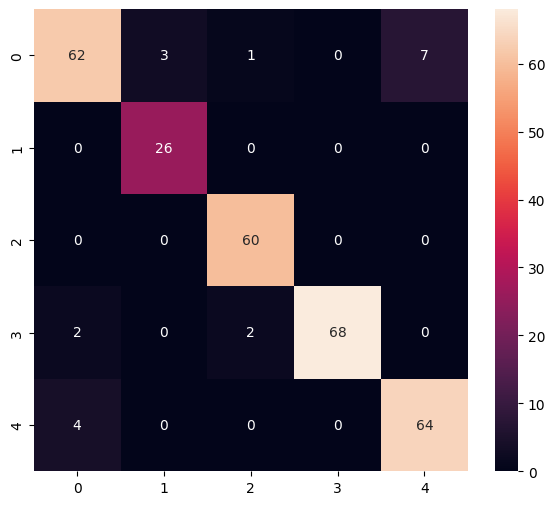

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        73
           1       0.90      1.00      0.95        26
           2       0.95      1.00      0.98        60
           3       1.00      0.94      0.97        72
           4       0.90      0.94      0.92        68

    accuracy                           0.94       299
   macro avg       0.93      0.95      0.94       299
weighted avg       0.94      0.94      0.94       299



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp6cfknz0j/assets


INFO:tensorflow:Assets written to: /tmp/tmp6cfknz0j/assets


Saved artifact at '/tmp/tmp6cfknz0j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  281469945277680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281469945281904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281469944196336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281469944197040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281469944317376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281469944316672: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1753693723.362638   28367 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1753693723.362701   28367 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1753693723.370062   28367 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6600

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 238 μs, total: 238 μs
Wall time: 186 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.02574965 0.20939708 0.00376714 0.7483472  0.01273895]
3
